# IMPORTING REQUIRED LIBRARIES

In [5]:
import cv2
import numpy as np
import glob
import random
import os
import matplotlib.pyplot as plt

# READING THE TEST IMAGE AND TEMPLATE

Since the test image contains much smaller instances of the templates, therefore certain scaling is required

In [2]:
img_rgb = cv2.imread('expert/test_image (1).png')
img_rgb = cv2.resize(img_rgb, (0, 0),fx=2,fy=2)
img_gray = cv2.imread('expert/test_image (1).png',0)
tem = glob.glob('expert/templates/*.png')

# DETECTING THE TEMPLATE

Detecting using opencv template matching

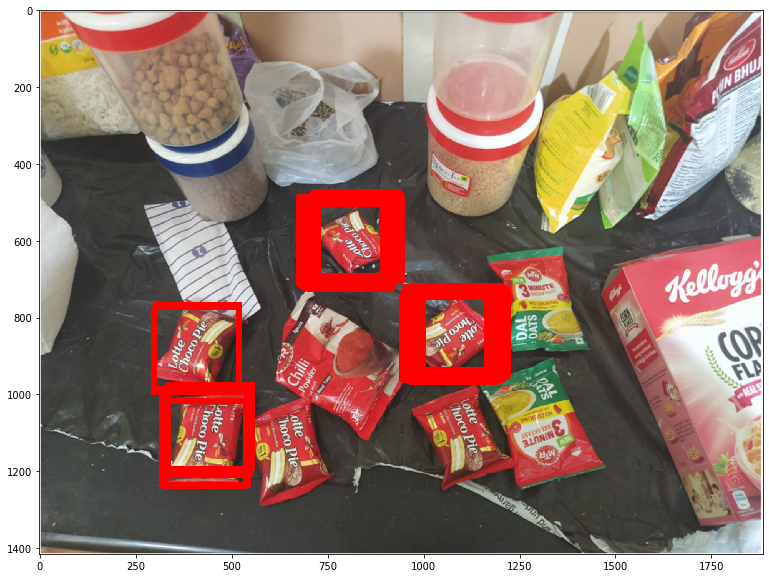

In [3]:
img_rgb = cv2.imread('expert/test_image (1).png')
img_rgb = cv2.resize(img_rgb, (0, 0),fx=2,fy=2)
img_gray = cv2.imread('expert/test_image (1).png',0)
tem = glob.glob('expert/templates/*.png')
pts=[]
for path in tem[1:]:
    template = cv2.imread(path)
    template = cv2.resize(template, (220,220),interpolation = cv2.INTER_CUBIC)
    w, h = template.shape[:-1]
    res = cv2.matchTemplate(img_rgb,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.42
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255),1)
        
plt.figure(figsize = (100,10))
img_rgb=cv2.cvtColor(img_rgb,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

**4/6 instances are detected, but still 2/6 are not detected, so we try other approaches such as yolo object detection**

The yolo model was trained using a colab file with this [link](https://colab.research.google.com/drive/1YbRHcGEkxUiWvIoKPYA-DSYKBkVb3bKv?usp=sharing). The images used, were the same as the templates provided

In [8]:
net = cv2.dnn.readNet("yolov3_training_last.weights", "yolov3_testing.cfg")

# Name custom object
classes = ["choco"]

# Images path
images_path = glob.glob("expert/*.png")



layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Insert here the path of your images
random.shuffle(images_path)

0
[[0]]


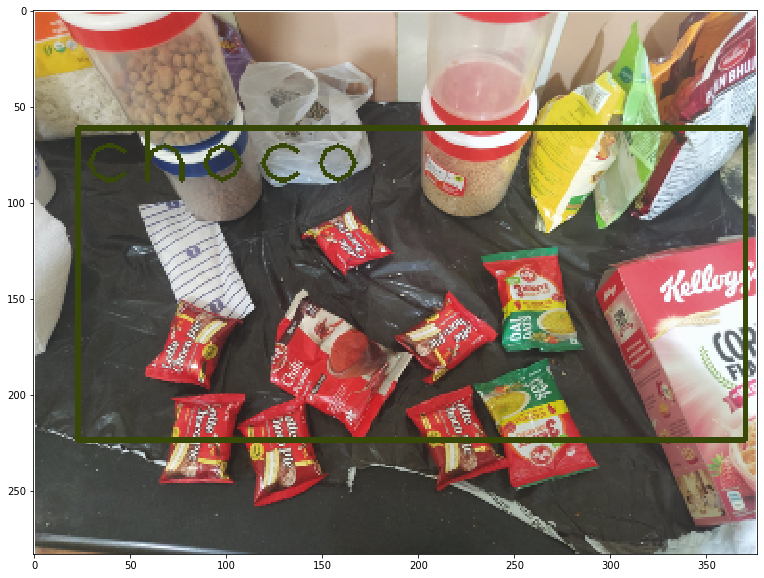

In [13]:
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 2)


    plt.figure(figsize = (100,10))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)



The yolo detection model doesn't help much!!

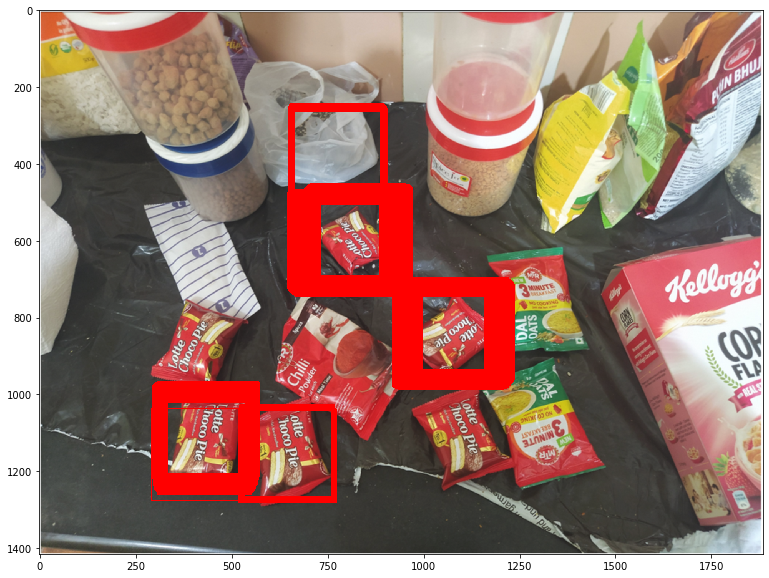

In [30]:
img_rgb = cv2.imread('expert/test_image (1).png')
img_rgb = cv2.resize(img_rgb, (0, 0),fx=2,fy=2)
img_gray = cv2.imread('expert/test_image (1).png',0)
tem = glob.glob('expert/templates/*.png')
pts=[]
for path in tem[1:]:
    template = cv2.imread(path)
    template = cv2.resize(template, (230,230),interpolation = cv2.INTER_AREA)
    w, h = template.shape[:-1]
    res = cv2.matchTemplate(img_rgb,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.4
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255),1)
        
plt.figure(figsize = (100,10))
img_rgb=cv2.cvtColor(img_rgb,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

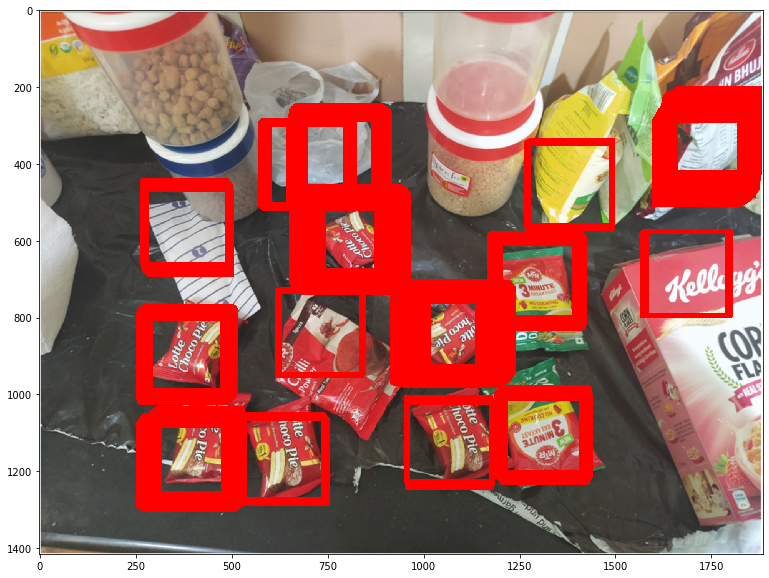

In [17]:
img_rgb = cv2.imread('expert/test_image (1).png')
img_rgb = cv2.resize(img_rgb, (0, 0),fx=2,fy=2)
img_gray = cv2.imread('expert/test_image (1).png',0)
tem = glob.glob('expert/templates/*.png')
pts=[]
for path in tem[1:]:
    template = cv2.imread(path)
    template = cv2.resize(template, (220,220),interpolation = cv2.INTER_CUBIC)
    w, h = template.shape[:-1]
    res = cv2.matchTemplate(img_rgb,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.33
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255),1)
        
plt.figure(figsize = (100,10))
img_rgb=cv2.cvtColor(img_rgb,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Here more/all the instances have been detected, but a lot of false positives are also present